In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = sns.load_dataset("mpg")

X_train, y_train = df[~df["horsepower"].isna()][["displacement", "acceleration"]], df[~df["horsepower"].isna()]["horsepower"]
X_pred = df[df["horsepower"].isna()][["displacement", "acceleration"]]

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_pred)
y_pred = np.round(y_pred)
df.loc[X_pred.index, "horsepower"] = y_pred
df = pd.get_dummies(df.drop("name", axis = 1), columns = ["origin"])
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,0,1


In [3]:
X, y = df.drop(["mpg"], axis = 1).values, df["mpg"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42)

In [4]:
scaler = StandardScaler()
#scaler = MinMaxScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_val = scaler.transform(X_val)
scaled_X_test = scaler.transform(X_test)

In [5]:
from evolutionary_algos import EvoMLPRegressor

In [11]:
regressor = EvoMLPRegressor(n = 240, hidden_layers = [16], activation = "relu", random_state = 42)
regressor.fit(scaled_X_train, y_train, epochs = 10000, validation_data = (scaled_X_val, y_val), verbose = 1)

Epoch 0 - loss: 7.737057559160331 - val_loss: 8.01487563511419
Epoch 1 - loss: 7.510331828695556 - val_loss: 8.968397931066926
Epoch 2 - loss: 6.5947106040460755 - val_loss: 7.0458890972361505
Epoch 4 - loss: 5.829510974233065 - val_loss: 4.908348079817188
Epoch 5 - loss: 5.281573644652448 - val_loss: 4.607294742401278
Epoch 10 - loss: 5.112338479928962 - val_loss: 4.755319630232976
Epoch 11 - loss: 4.900885896319837 - val_loss: 5.699607911615603
Epoch 20 - loss: 4.733582000861924 - val_loss: 4.326982884667847
Epoch 25 - loss: 4.634677176188427 - val_loss: 4.266749060398398
Epoch 31 - loss: 4.596983524063516 - val_loss: 4.909666057905956
Epoch 32 - loss: 3.9444251938768815 - val_loss: 3.7948153497907677
Epoch 48 - loss: 3.913337989896924 - val_loss: 4.15412824898813
Epoch 53 - loss: 3.5760343636423015 - val_loss: 3.5443791654741332
Epoch 59 - loss: 3.505001437926961 - val_loss: 3.342708554591469
Epoch 68 - loss: 3.5000433360136887 - val_loss: 3.3229922460243655
Epoch 71 - loss: 3.40396

KeyboardInterrupt: 

Loss on test data: 1.5985694366734164


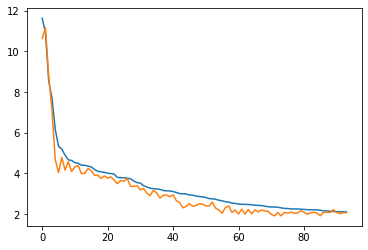

In [7]:
y_pred = regressor.predict(scaled_X_test)
print(f"Loss on test data: {mean_absolute_error(y_test, y_pred)}")

fig, ax = plt.subplots(1, 1)

ax.plot(regressor.training_loss_history)
ax.plot(regressor.validation_loss_history)

plt.show()

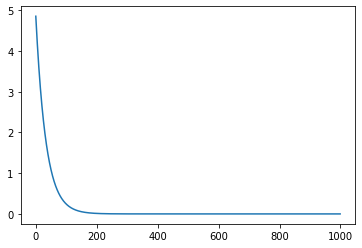

In [8]:
y = []
xrange = 1000

for x in range(1, xrange + 1):
    y.append(5 * 1 / math.exp(x / (xrange / (10 * math.log10(xrange)))))

plt.plot(list(range(xrange)), y)